In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Academic Performance.csv")

In [3]:
df.head()

,Roll no,Name,Subjects,DSA,OS,DBMS,CN,Data Science,Percentage,Department,Attendance,Gender
0,31101,Aditya,5,91,87,90,99,77.0,94,Comp,80,Male
1,31102,Ajinkya,5,89,89,79,93,89.0,89,Comp,90,Male
2,31103,Amit,5,95,81,66,2,81.0,88,Comp,79,Male
3,31104,Chetan,5,85,96,82,86,96.0,87,Comp,66,Male
4,31105,Chaitanya,5,80,70,75,83,70.0,85,Comp,82,Male


In [4]:
df.isna().sum()

Roll no         0
Name            0
Subjects        0
DSA             0
OS              0
DBMS            0
CN              0
Data Science    4
Percentage      0
Department      0
Attendance      0
Gender          0
dtype: int64

In [5]:
df1=df.copy()
df.head()

,Roll no,Name,Subjects,DSA,OS,DBMS,CN,Data Science,Percentage,Department,Attendance,Gender
0,31101,Aditya,5,91,87,90,99,77.0,94,Comp,80,Male
1,31102,Ajinkya,5,89,89,79,93,89.0,89,Comp,90,Male
2,31103,Amit,5,95,81,66,2,81.0,88,Comp,79,Male
3,31104,Chetan,5,85,96,82,86,96.0,87,Comp,66,Male
4,31105,Chaitanya,5,80,70,75,83,70.0,85,Comp,82,Male


In [6]:
mean_ds=df1['Data Science'].mean()
df1['Data Science'].fillna(mean_ds,inplace=True)

In [7]:
df1.isnull().sum()

Roll no         0
Name            0
Subjects        0
DSA             0
OS              0
DBMS            0
CN              0
Data Science    0
Percentage      0
Department      0
Attendance      0
Gender          0
dtype: int64

In [8]:
df1.dtypes

Roll no           int64
Name             object
Subjects          int64
DSA               int64
OS                int64
DBMS              int64
CN                int64
Data Science    float64
Percentage        int64
Department       object
Attendance        int64
Gender           object
dtype: object

In [9]:
df1 = df1.astype({"Data Science":int})

In [10]:
df1.dtypes

Roll no          int64
Name            object
Subjects         int64
DSA              int64
OS               int64
DBMS             int64
CN               int64
Data Science     int32
Percentage       int64
Department      object
Attendance       int64
Gender          object
dtype: object

In [11]:
df1

,Roll no,Name,Subjects,DSA,OS,DBMS,CN,Data Science,Percentage,Department,Attendance,Gender
0,31101,Aditya,5,91,87,90,99,77,94,Comp,80,Male
1,31102,Ajinkya,5,89,89,79,93,89,89,Comp,90,Male
2,31103,Amit,5,95,81,66,2,81,88,Comp,79,Male
3,31104,Chetan,5,85,96,82,86,96,87,Comp,66,Male
4,31105,Chaitanya,5,80,70,75,83,70,85,Comp,82,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
84,31185,Kristian,5,87,67,93,86,89,90,Comp,90,Male
85,31186,Kelvin,5,94,77,86,83,81,95,Comp,79,Male
86,31187,Brooke,5,85,89,86,77,96,99,Comp,66,Female
87,31188,Belinda,5,80,77,83,94,70,92,Comp,78,Female


<AxesSubplot:xlabel='CN'>

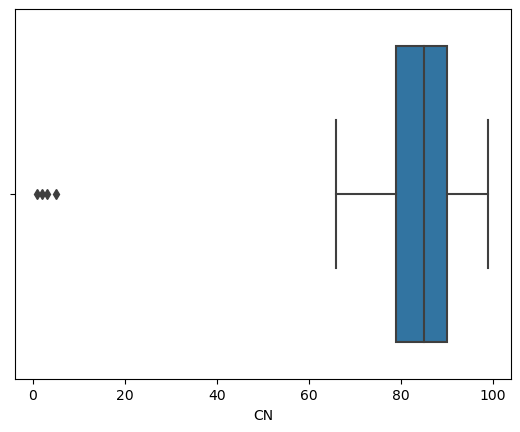

In [12]:
import seaborn as sn
sn.boxplot(x=df1['CN'])

<AxesSubplot:xlabel='DBMS'>

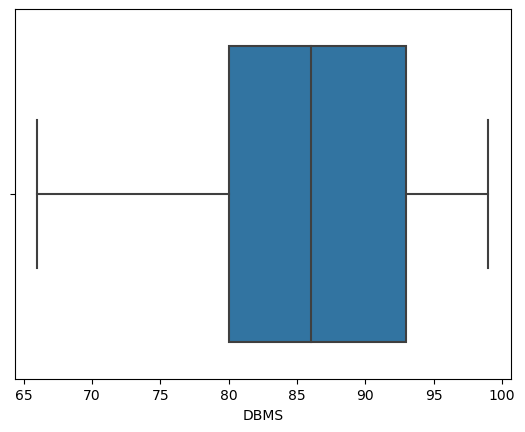

In [13]:
import seaborn as sn
sn.boxplot(x=df1['DBMS'])

<AxesSubplot:xlabel='OS'>

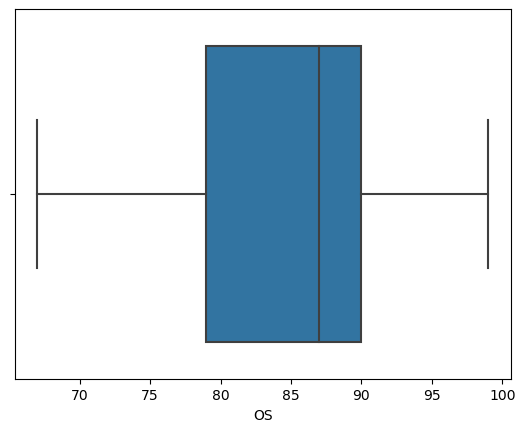

In [14]:
import seaborn as sn
sn.boxplot(x=df1['OS'])

In [15]:
from scipy import stats
z = np.abs(stats.zscore(df1['CN']))

In [16]:
z

0     0.938935
1     0.621599
2     4.191334
3     0.251373
4     0.092705
        ...   
84    0.251373
85    0.092705
86    0.224631
87    0.674488
88    0.489078
Name: CN, Length: 89, dtype: float64

In [17]:
arr = np.where(z>2)
arr[0]

array([ 2,  8, 20, 30], dtype=int64)

In [18]:
li = arr[0].tolist()
li

[2, 8, 20, 30]

In [19]:
for i in li:
    df1=df1.drop(df1.index[i])

In [20]:
df1.shape

(85, 12)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,10))
df1[['Percentage']] = scaler.fit_transform(df1[['Percentage']])
df1['Percentage'] = df1['Percentage'].round(1)

In [22]:
df1

,Roll no,Name,Subjects,DSA,OS,DBMS,CN,Data Science,Percentage,Department,Attendance,Gender
0,31101,Aditya,5,91,87,90,99,77,7.4,Comp,80,Male
1,31102,Ajinkya,5,89,89,79,93,89,4.7,Comp,90,Male
3,31104,Chetan,5,85,96,82,86,96,3.7,Comp,66,Male
4,31105,Chaitanya,5,80,70,75,83,70,2.6,Comp,82,Male
5,31106,David,5,87,99,99,87,84,5.8,Comp,75,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
84,31185,Kristian,5,87,67,93,86,89,5.3,Comp,90,Male
85,31186,Kelvin,5,94,77,86,83,81,7.9,Comp,79,Male
86,31187,Brooke,5,85,89,86,77,96,10.0,Comp,66,Female
87,31188,Belinda,5,80,77,83,94,70,6.3,Comp,78,Female
